 <img src="./markdown/reco.jpg" alt="Recommendation system" style="display: block;
  margin-left: auto;
  margin-right: auto;
  width: 80%;height:350px"> 

<h1 style="text-align:center;font-size:35px;">Recipe recommendation system</h1>
<br>

<h1 style="font-size:30px;color:#008abc;">Introduction</h1>

#### The goal of this project is to ultimately create a personalized recipe recommendation system that learns from the choice of its users. 
##### Data source and fields explanation:https://data.world/atlas-query/cookbook


##### Due to feasibility limitations, the recommender system will not be able to track users` preferences so that we will come up with a new goal.

## Healthy recommender system 
##### This system will keep track of the ingredients from each recipe, also will keep track of the important and needed intake of nutrients for a healthy nutrition.
<br>

### Import required Libraries.

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data from all 4 tables

In [141]:
df_ingredients = pd.read_csv('./data/ingredient.csv')
df_nutrition = pd.read_csv('./data/nutrition.csv')
df_quantity = pd.read_csv('./data/quantity.csv')
df_recipe = pd.read_csv('./data/recipe.csv')

<br>
<br>
<h1 style="font-size:30px;color:#008abc;">Data Cleaning and Aggregation (DCA)</h1>

## Ingredients table


In [142]:
df_ingredients.head()

,ingredient_id,category,name,plural
0,1,dairy,1% lowfat cottage cheese,NaN
1,6,dairy,1% lowfat milk,NaN
2,10,Mexican products,10-inch flour tortilla,s
3,11,cereals,100% bran cereal,NaN
4,12,dairy,2% lowfat milk,NaN


#### With our end goal in mind, we can make a few assumptions:
<ul>
    <li>we keep 'category' column because some categories may be considered healthy</li>
    <li>we cannot say anything about the 'name', but we keep it for now</li>
    <li>we drop 'plural' column, because in a recipe we understand which ingredient to use without checking its plural form</li>
</ul>

In [143]:
df_ingredients = df_ingredients.drop(['plural'], axis=1)

<br>

## Nutrition table

In [144]:
df_nutrition.head()

,recipe_id,protein,carbo,alcohol,total_fat,sat_fat,cholestrl,sodium,iron,vitamin_c,vitamin_a,fiber,pcnt_cal_carb,pcnt_cal_fat,pcnt_cal_prot,calories
0,214,5.47,41.29,0.00,11.53,2.21,1.39,260.78,0.81,8.89,586.20,0.87,56.80,35.68,7.53,290.79
1,215,5.70,23.75,1.93,1.08,0.58,3.48,46.17,0.57,13.02,2738.24,0.62,67.38,6.89,16.17,141.01
2,216,4.90,26.88,0.00,1.10,0.58,3.46,41.79,0.37,6.13,1521.10,0.34,78.45,7.24,14.30,137.06
3,217,1.77,18.17,0.00,0.21,0.06,0.00,14.01,0.19,8.79,478.09,0.69,88.98,2.35,8.67,81.70
4,218,1.38,36.63,0.00,5.47,3.46,10.36,50.22,0.66,0.16,229.16,1.05,72.81,24.46,2.73,201.23


#### By making some research on what does it make a recipe to be considered healthy, we found that:
<ul>
    <li>protein</li>
    <li>carbohydrate</li>
    <li>fat</li>
    <li>cholesterol</li>
    <li>sodium</li>
    <li>calories</li>
</ul>

##### These nutrients mentioned above usually can measure how healthy a recipe is. Reference (https://www.abc.net.au/health/library/stories/2007/04/23/1904178.htm)
<br>
Taking these into account, we create a new Data Frame which contains all the 'healthy' nutrients mentioned above.

In [145]:
df_nutrition_healthy = df_nutrition.drop(['alcohol','sat_fat', 'iron', 'vitamin_c', 'vitamin_a',
                                         'fiber', 'pcnt_cal_carb', 'pcnt_cal_fat', 'pcnt_cal_prot'], axis=1)

<br>

## Quantity table

In [146]:
df_quantity.head()

,quantity_id,recipe_id,ingredient_id,max_qty,min_qty,unit,preparation,optional
0,1,214,1613,2.00,2.00,cup(s),NaN,False
1,2,214,3334,0.25,0.25,cup(s),NaN,False
2,3,214,2222,0.50,0.50,cup(s),melted,False
3,4,214,2797,0.25,0.25,cup(s),or water,False
4,5,214,3567,3.00,3.00,teaspoon(s),NaN,False


In [147]:
df_quantity.sample(15)

,quantity_id,recipe_id,ingredient_id,max_qty,min_qty,unit,preparation,optional
4622,5785,1209,2019,1.00,1.00,teaspoon(s),NaN,False
1760,2175,570,2523,0.25,0.25,cup(s),grated,False
2443,3054,667,2282,3.00,3.00,cup(s),chopped,False
4903,6132,1384,2270,1.00,1.00,clove(s),minced,False
606,732,299,2220,3.00,3.00,tablespoon(s),NaN,False
337,401,260,351,0.50,0.50,cup(s),packed,False
796,963,432,2521,6.00,6.00,piece(s),NaN,False
2071,2573,609,2478,1.00,1.00,cup(s),uncooked,False
2970,3709,1022,3551,3.00,2.00,pound(s),NaN,False
3115,3885,1039,2194,0.75,0.75,cup(s),NaN,False


### From taking some samples of the Quantity table we can notice that 'max_qty' and 'min_qty' are usually equal, but there are cases when these differ. 
##### Taking into account that there is a quantity of an ingredient in a recipe, it is better to keep track of only one variable instead of comparing 'max_qty' and 'min_qty' and put use the quantity from somewhere in the middle of these two. 
##### Furthermore, we take the average of 'max_qty' and 'min_qty' and create a new column and also we drop 'max_qty' and 'min_qty' columns.


In [148]:
df_quantity['qty'] = df_quantity[['max_qty', 'min_qty']].mean(axis=1)

In [149]:
df_quantity = df_quantity.drop(['max_qty', 'min_qty'], axis=1)

<br>

#### If the ingredient is optional delete it from the Quantity table and drop the optional column.

In [150]:
df_quantity = df_quantity[df_quantity.optional != True]
df_quantity.reset_index()

,index,quantity_id,recipe_id,ingredient_id,unit,preparation,optional,qty
0,0,1,214,1613,cup(s),NaN,False,2.00
1,1,2,214,3334,cup(s),NaN,False,0.25
2,2,3,214,2222,cup(s),melted,False,0.50
3,3,4,214,2797,cup(s),or water,False,0.25
4,4,5,214,3567,teaspoon(s),NaN,False,3.00
...,...,...,...,...,...,...,...,...
5041,5087,6349,1119,289,pound(s),NaN,False,6.00
5042,5088,6350,1119,3261,milliliter(s),NaN,False,750.00
5043,5089,6351,1119,638,cup(s),NaN,False,1.00
5044,5090,6352,1119,1420,teaspoon(s),chopped,False,3.00


In [151]:
df_quantity = df_quantity.drop(['optional'], axis=1)

In [152]:
df_quantity.shape

(5046, 6)

<br>

## Recipe table

In [153]:
df_recipe.head()

,recipe_id,title,subtitle,servings,yield_unit,prep_min,cook_min,stnd_min,source,intro,directions
0,214,Raspberry Chiffon Pie,NaN,10,1 pie,20,8,305,The California Tree Fruit Agreement,NaN,"For crust, preheat oven to 375 degrees F.\nIn..."
1,215,Apricot Yogurt Parfaits,NaN,4,NaN,5,2,65,Produce for Better Health Foundation and 5 a Day,NaN,"Drain canned apricots, pour 1/4 cup of the ju..."
2,216,Fresh Apricot Bavarian,NaN,8,NaN,5,13,0,The California Apricot Advisory Board,Serve in stemmed glasses and top with sliced a...,Drop apricots into boiling water to cover. R...
3,217,Fresh Peaches,with Banana Cream Whip,4,NaN,10,0,0,Produce for Better Health Foundation and 5 a Day,"For a quick, low-cal dessert, serve this on o...","In a small bowl, beat egg white until foamy. ..."
4,218,Canned Cherry Crisp,NaN,6,NaN,10,5,0,The Cherry Marketing Institute,Your microwave turns a can of cherry pie filli...,"Pour cherry pie filling into an 8-inch, round..."


<br>

#### Merge 'title' and 'subtitle' into 'title' column and drop 'subtitle'

In [154]:
df_recipe['title'] = np.where(df_recipe['subtitle'].isnull() == True, 
                              df_recipe['title'],
                              df_recipe['title'] + " " + df_recipe['subtitle']
                             )

In [155]:
df_recipe = df_recipe.drop(['subtitle'], axis=1)

<br>

#### Merge 'intro' and 'directions' into 'directions' column and drop 'intro'

In [156]:
df_recipe['directions'] = np.where(df_recipe['intro'].isnull() == True, 
                              df_recipe['directions'],
                              df_recipe['directions'] + " " + df_recipe['intro']
                             )

In [157]:
df_recipe = df_recipe.drop(['intro'], axis=1)

#### Drop 'source'

In [158]:
df_recipe = df_recipe.drop(['source'], axis=1)
df_recipe.head()

,recipe_id,title,servings,yield_unit,prep_min,cook_min,stnd_min,directions
0,214,Raspberry Chiffon Pie,10,1 pie,20,8,305,"For crust, preheat oven to 375 degrees F.\nIn..."
1,215,Apricot Yogurt Parfaits,4,NaN,5,2,65,"Drain canned apricots, pour 1/4 cup of the ju..."
2,216,Fresh Apricot Bavarian,8,NaN,5,13,0,Drop apricots into boiling water to cover. R...
3,217,Fresh Peaches with Banana Cream Whip,4,NaN,10,0,0,"In a small bowl, beat egg white until foamy. ..."
4,218,Canned Cherry Crisp,6,NaN,10,5,0,"Pour cherry pie filling into an 8-inch, round..."


<br>

#### Taking into account that each variable represents a column and each row represents an observation:

In [159]:
df_recipe_long = pd.melt(
    df_recipe, 
    id_vars=['recipe_id', 'title', 'servings', 'yield_unit', 'directions'],
    var_name='time',
    value_name='minutes'
)
df_recipe_long

,recipe_id,title,servings,yield_unit,directions,time,minutes
0,214,Raspberry Chiffon Pie,10,1 pie,"For crust, preheat oven to 375 degrees F.\nIn...",prep_min,20
1,215,Apricot Yogurt Parfaits,4,NaN,"Drain canned apricots, pour 1/4 cup of the ju...",prep_min,5
2,216,Fresh Apricot Bavarian,8,NaN,Drop apricots into boiling water to cover. R...,prep_min,5
3,217,Fresh Peaches with Banana Cream Whip,4,NaN,"In a small bowl, beat egg white until foamy. ...",prep_min,10
4,218,Canned Cherry Crisp,6,NaN,"Pour cherry pie filling into an 8-inch, round...",prep_min,10
...,...,...,...,...,...,...,...
2629,1410,No-Bake Chocolate Cheesecake,12,NaN,Prepare Crumb-Nut Crust (directions follow); ...,stnd_min,120
2630,1411,Mexican Cocoa Torte,10,NaN,"Combine sugar, cocoa, cinnamon, shortening an...",stnd_min,120
2631,1426,-Pancakes-,4,8,Sour milk by putting 1 tablespoon vinegar in ...,stnd_min,0
2632,1427,-Waffles-,8,8 waffles,Preheat waffle iron according to manufacturer...,stnd_min,0


<br>

## Combine the information that we need for our goal into one tidy table.
#### We consider that we need a table that contains:
<ul>
    <li>all ingredients used in a recipe</li>
    <li>nutrition metrics for a recipe</li>    
    <li>category of an ingredient</li>
</ul>
<br>

##### Start by merging Quantity and Ingredients tables, by including the 'category' and 'name' of the ingredient in the Quantity table.
##### Here any type of join would not change the output, but we use a 'left' join because it is a good practice.

In [160]:
df_quantity_ingredient = pd.merge(df_quantity, df_ingredients, on='ingredient_id', how='left')
df_quantity_ingredient.head()

,quantity_id,recipe_id,ingredient_id,unit,preparation,qty,category,name
0,1,214,1613,cup(s),NaN,2.00,cookies/crackers,graham cracker crumbs
1,2,214,3334,cup(s),NaN,0.25,baking products,sugar
2,3,214,2222,cup(s),melted,0.50,dairy,margarine or butter
3,4,214,2797,cup(s),or water,0.25,fruit juices,raspberry juice
4,5,214,3567,teaspoon(s),NaN,3.00,gelatin,unflavored gelatin


<br>

##### Clean the recipe table so that it contains only the nutrients that we will use for measuring how healthy a recipe is.

In [161]:
df_recipe.head()

,recipe_id,title,servings,yield_unit,prep_min,cook_min,stnd_min,directions
0,214,Raspberry Chiffon Pie,10,1 pie,20,8,305,"For crust, preheat oven to 375 degrees F.\nIn..."
1,215,Apricot Yogurt Parfaits,4,NaN,5,2,65,"Drain canned apricots, pour 1/4 cup of the ju..."
2,216,Fresh Apricot Bavarian,8,NaN,5,13,0,Drop apricots into boiling water to cover. R...
3,217,Fresh Peaches with Banana Cream Whip,4,NaN,10,0,0,"In a small bowl, beat egg white until foamy. ..."
4,218,Canned Cherry Crisp,6,NaN,10,5,0,"Pour cherry pie filling into an 8-inch, round..."


In [162]:
df_recipe_clean = df_recipe.drop(['yield_unit'], axis=1)
df_recipe_nutrients_clean = pd.merge(df_recipe_clean, df_nutrition_healthy, on='recipe_id', how='inner')
df_recipe_nutrients_clean.head(10)

,recipe_id,title,servings,prep_min,cook_min,stnd_min,directions,protein,carbo,total_fat,cholestrl,sodium,calories
0,214,Raspberry Chiffon Pie,10,20,8,305,"For crust, preheat oven to 375 degrees F.\nIn...",5.47,41.29,11.53,1.39,260.78,290.79
1,215,Apricot Yogurt Parfaits,4,5,2,65,"Drain canned apricots, pour 1/4 cup of the ju...",5.70,23.75,1.08,3.48,46.17,141.01
2,216,Fresh Apricot Bavarian,8,5,13,0,Drop apricots into boiling water to cover. R...,4.90,26.88,1.10,3.46,41.79,137.06
3,217,Fresh Peaches with Banana Cream Whip,4,10,0,0,"In a small bowl, beat egg white until foamy. ...",1.77,18.17,0.21,0.00,14.01,81.70
4,218,Canned Cherry Crisp,6,10,5,0,"Pour cherry pie filling into an 8-inch, round...",1.38,36.63,5.47,10.36,50.22,201.23
5,219,Low Calorie Blueberry Meringue Tarts,8,10,30,60,In a bowl beat egg whites until very stiff. ...,3.38,8.04,0.16,0.55,40.01,66.03
6,220,Chocolate Cream Cheese Frosting,12,6,0,0,"Place softened cream cheese, butter, vanilla,...",1.53,27.17,8.14,23.60,81.26,188.10
7,226,Apple Upside Down Cake,16,20,45,20,"Combine apples, 1 cup sugar, butter and cinna...",3.71,43.21,11.92,31.59,231.95,294.95
8,227,Peaches Amaretto,4,15,10,0,"In small saucepan, combine milk, cornstarch a...",2.53,12.71,0.13,0.55,29.49,62.16
9,228,Homemade Cherry Pie Filling,12,10,20,60,"If frozen cherries are used, heat in saucepan...",0.84,32.74,0.02,0.00,4.04,134.51


In [163]:
df_quantity_ingredient.shape

(5046, 8)

<br>

#### Merge all the needed information into one table, drop the 'quantity_id', 'ingredient_id' and 'preparation'.

In [164]:
df_recipe_recommender = pd.merge(df_quantity_ingredient, df_recipe_nutrients_clean, on='recipe_id', how='inner')
df_recipe_recommender.head()

,quantity_id,recipe_id,ingredient_id,unit,preparation,qty,category,name,title,servings,prep_min,cook_min,stnd_min,directions,protein,carbo,total_fat,cholestrl,sodium,calories
0,1,214,1613,cup(s),NaN,2.00,cookies/crackers,graham cracker crumbs,Raspberry Chiffon Pie,10,20,8,305,"For crust, preheat oven to 375 degrees F.\nIn...",5.47,41.29,11.53,1.39,260.78,290.79
1,2,214,3334,cup(s),NaN,0.25,baking products,sugar,Raspberry Chiffon Pie,10,20,8,305,"For crust, preheat oven to 375 degrees F.\nIn...",5.47,41.29,11.53,1.39,260.78,290.79
2,3,214,2222,cup(s),melted,0.50,dairy,margarine or butter,Raspberry Chiffon Pie,10,20,8,305,"For crust, preheat oven to 375 degrees F.\nIn...",5.47,41.29,11.53,1.39,260.78,290.79
3,4,214,2797,cup(s),or water,0.25,fruit juices,raspberry juice,Raspberry Chiffon Pie,10,20,8,305,"For crust, preheat oven to 375 degrees F.\nIn...",5.47,41.29,11.53,1.39,260.78,290.79
4,5,214,3567,teaspoon(s),NaN,3.00,gelatin,unflavored gelatin,Raspberry Chiffon Pie,10,20,8,305,"For crust, preheat oven to 375 degrees F.\nIn...",5.47,41.29,11.53,1.39,260.78,290.79


In [165]:
df_recipe_recommender = df_recipe_recommender.drop(['quantity_id', 'ingredient_id', 'preparation'], axis=1)

<br>

#### We can notice that we did not lose any data.

In [166]:
df_recipe_recommender.shape

(5046, 17)

<br>

### Exports cleaned tables to csv:

In [167]:
df_recipe_recommender.to_csv('./exports/recipe_recommender.csv', index=False)
df_nutrients_for_health = df_recipe_nutrients_clean[['protein', 'carbo', 'total_fat', 'cholestrl', 'sodium','calories']]
df_nutrients_for_health.to_csv('./exports/nutrients_for_health.csv', index=False)


In [168]:
df_nutrients_for_health = df_recipe_nutrients_clean[['protein', 'carbo', 'total_fat', 'cholestrl', 'sodium','calories']]
df_nutrients_for_health.describe()

,protein,carbo,total_fat,cholestrl,sodium,calories
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,12.203189,26.963132,6.579032,36.166344,341.498519,217.914465
std,14.060335,20.391097,7.209403,57.638835,588.022379,149.079768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.030000,10.602500,0.772500,0.000000,39.822500,103.820000
50%,5.885000,24.340000,4.705000,6.530000,198.895000,190.160000
75%,20.075000,38.045000,9.785000,56.877500,470.672500,310.505000
max,105.650000,116.780000,53.230000,443.040000,12092.600000,892.040000


#### From the above table we can see the exact statistics of the nutrients from all the recipes. We can notice that for all nutrients, the mean is higher than the median so we expect a right skewness in all distributions.
#### Let`s further visualize all the above mentioned numbers.

Graph for protein/serving


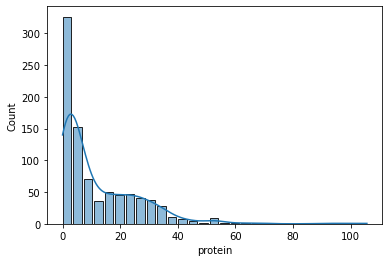

Graph for carbo/serving


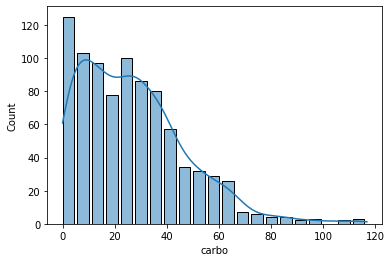

Graph for total_fat/serving


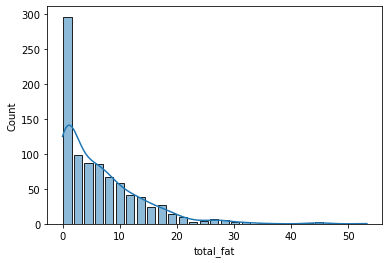

Graph for cholestrl/serving


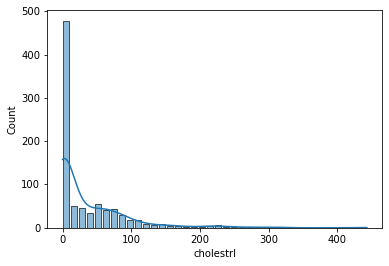

Graph for sodium/serving


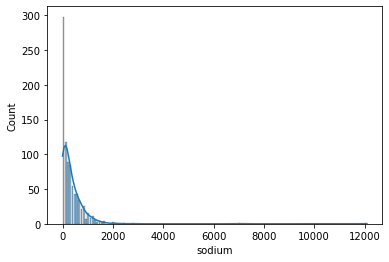

Graph for calories/serving


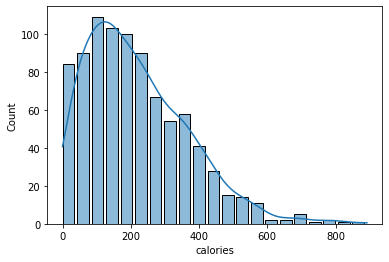

In [169]:
for i in df_nutrients_for_health.columns:
    print("Graph for %s/serving" % (i))
    sns.histplot(x=df_nutrients_for_health[i], kde=True, shrink=.8)
    plt.show()

#### We can notice that all the distributions are right skewed. 
##### This means, that the majority of the recipe`s nutrients situates in a smaller range 0-n(depending on the nutrient) and there are some outlier recipes which increase the mean and also IQR (Q3-Q1) of each nutrient. We use IQR in this situation, instead of STD, because the distributions are far away from normality.
<br>


### Let`s check if there are any correlations between the nutrients

<AxesSubplot:>

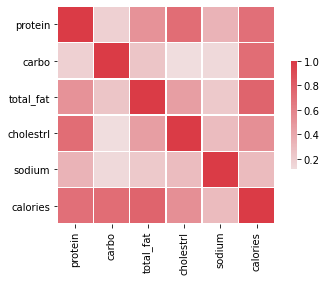

In [170]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df_nutrients_for_health.corr(), vmax=1, center=0, cmap=cmap,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

### As we can visualize there are some correlations between the nutrients.
Calories are correlated with:
<ul>
    <li>proteins</li>
    <li>carbohydrates</li>    
    <li>total fat</li>
    Less with: <ul><li>cholesterol</li></ul>
</ul>
Sodium is not correlated with any of these.<br>
Proteins are correlated with:
<ul>
    <li>total fat</li>
    <li>cholesterol</li>
</ul>
Cholesterol is also correlated with: -> total fat

<br>
<br>

### Let`s check what are the most used ingredient categories from our data set.

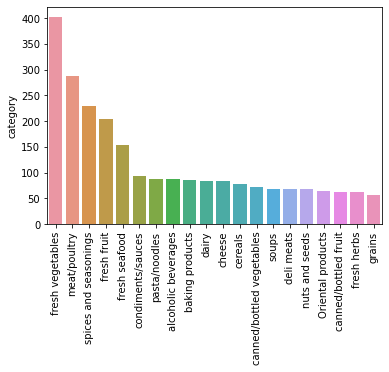

In [171]:
cat_num = df_ingredients['category'].value_counts()[:20]
chart = sns.barplot(x=cat_num.index, y=cat_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

#### We can notice that by far the most used ingredients are 'fresh vegetables'. This will be helpful for our goal.
<br>
<br>

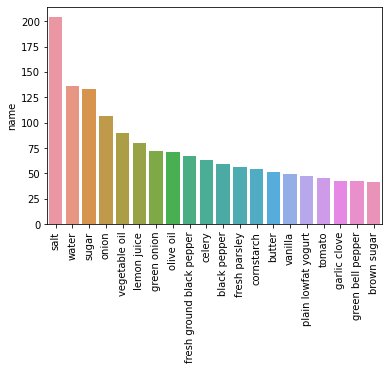

In [172]:
cat_num = df_recipe_recommender['name'].value_counts()[:20]
chart = sns.barplot(x=cat_num.index, y=cat_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

<br>
<br>

### Play with the data and check if we can find more correlations between variables.

#### Check if it any correlation between the total preparation time and the length of the 'directions' column. Suppose that if the recipe is more complicated and the instructions are larger, also the preparation time will be higher.
#### Create a new column in the 'df_recipe' table where we sum up all durations.

In [173]:
df_recipe['total_min'] = df_recipe['prep_min'] + df_recipe['cook_min'] + df_recipe['stnd_min']
#get direction length
df_recipe['dir_len'] = df_recipe['directions'].apply(lambda x: len(str(x)))

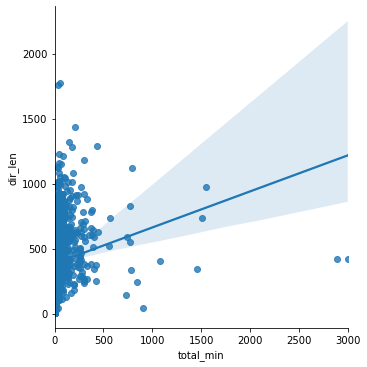

In [174]:
sns.lmplot(x="total_min", y="dir_len", data=df_recipe, palette="Set1")

#### We have a few outliers which may influence the output. Remove the outliers.

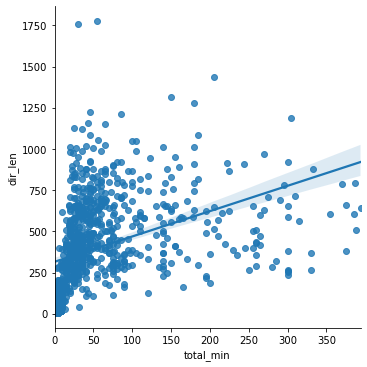

In [175]:
df_recipe_helper = df_recipe[df_recipe['total_min'] < 400]
sns.lmplot(x="total_min", y="dir_len", data=df_recipe_helper, palette="Set1")

<br>

#### Try another correlation visualization

<AxesSubplot:>

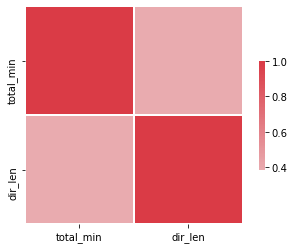

In [176]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df_recipe_helper[['total_min', 'dir_len']].corr(), vmax=1, center=0, cmap=cmap,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### We can notice that the duration of a recipe it is not correlated with the length of the instructions.